# **ML_notebook**

## Objectives

* In this notebook, we will build a machine learning model for California housing data set from Kaggle.
- load the dataset, 
- clean it, 
- remove outliers and fill missing values, 
- normalize the variables, 
- create a pipeline to use on multiple algorithms
- write a Python class to use for multiple algorithms
- find the best model and its hyperparameters.
- Get the best scores and plot them on train and test sets.
- save the model in a file for future use

## Inputs

* housing.csv dataset from kaggle

## Outputs

* best Model file named ML_model.pki 



### Importing librarries
First step is we will import important libraries for machine learning.

In [49]:
# import necessary libraries for data analysis and machine learning

import os
import glob
import zipfile
import shutil
import math
import itertools


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import pingouin as pg
%matplotlib inline

import plotly.express as px
import plotly.io as pio
from scipy import stats
from numpy.random import normal

import joblib
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler  
from sklearn.model_selection import train_test_split, cross_val_score
from feature_engine.selection import DropFeatures
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV

### ML algorithms 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor

from feature_engine.imputation import MeanMedianImputer
from feature_engine.imputation import CategoricalImputer
from feature_engine.encoding import OrdinalEncoder, OneHotEncoder

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 

import warnings
warnings.filterwarnings("ignore")

sns.set_style("whitegrid")

### Maschine Learning

For Maschine Learning We will use the original dataset which we downloaded from Kaggle.. We will clean and scale it in order to avoid overfitting and underfitting to get as accuracte results as possible

In [ ]:
# Load the California housing dataset from the specified path and display the first 5 rows
df = pd.read_csv("../inputs/datasets/raw/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [15]:
# Display the shape (number of rows and columns) of the dataframe
df.shape

(20640, 10)

We will check for missing values again.

In [13]:
# Check for missing values in each column of the dataframe
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

check for datarypes of columns

In [16]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

We will check the skewness and outliers in our variables.
we will use qq plot again to see the distributions

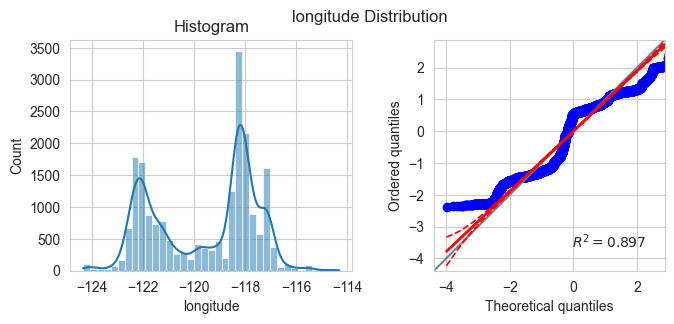

longitude: The distribution is approximately symmetric with a kurtosis of -1.33 (platykurtic (light tails, fewer outliers)).
The histogram shows the frequency and shape of the data, while the Q-Q plot compares it to a normal distribution. Deviations from the straight line in the Q-Q plot indicate departures from normality.



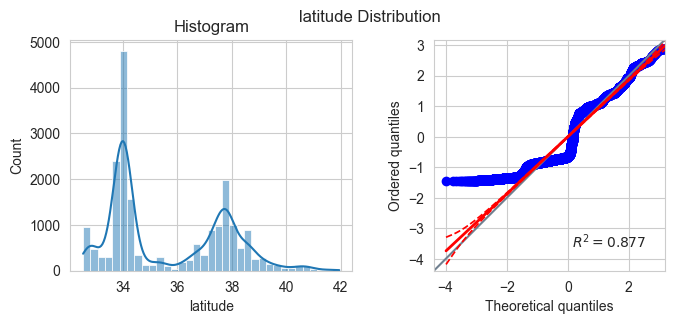

latitude: The distribution is approximately symmetric with a kurtosis of -1.12 (platykurtic (light tails, fewer outliers)).
The histogram shows the frequency and shape of the data, while the Q-Q plot compares it to a normal distribution. Deviations from the straight line in the Q-Q plot indicate departures from normality.



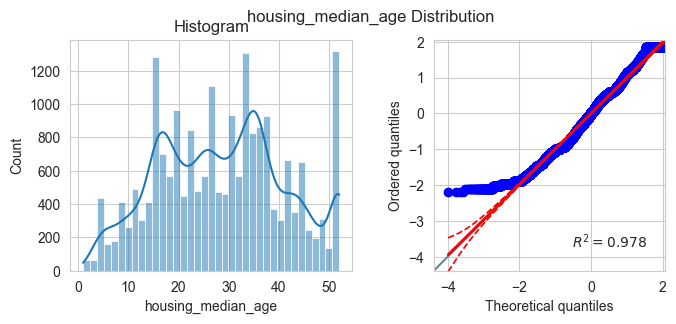

housing_median_age: The distribution is approximately symmetric with a kurtosis of -0.80 (platykurtic (light tails, fewer outliers)).
The histogram shows the frequency and shape of the data, while the Q-Q plot compares it to a normal distribution. Deviations from the straight line in the Q-Q plot indicate departures from normality.



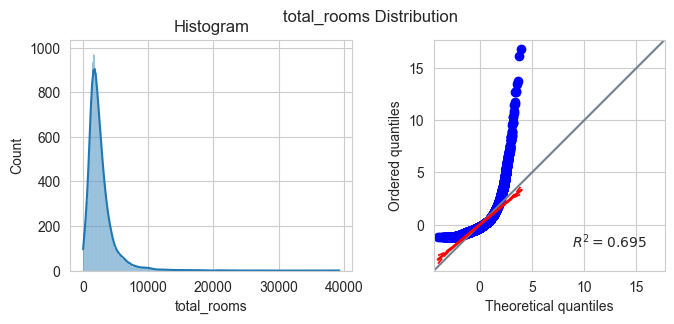

total_rooms: The distribution is right-skewed (long tail to the right) with a kurtosis of 32.63 (leptokurtic (heavy tails, more outliers)).
The histogram shows the frequency and shape of the data, while the Q-Q plot compares it to a normal distribution. Deviations from the straight line in the Q-Q plot indicate departures from normality.



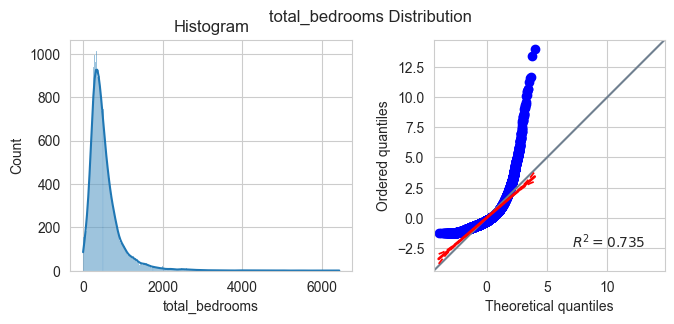

total_bedrooms: The distribution is right-skewed (long tail to the right) with a kurtosis of 21.99 (leptokurtic (heavy tails, more outliers)).
The histogram shows the frequency and shape of the data, while the Q-Q plot compares it to a normal distribution. Deviations from the straight line in the Q-Q plot indicate departures from normality.



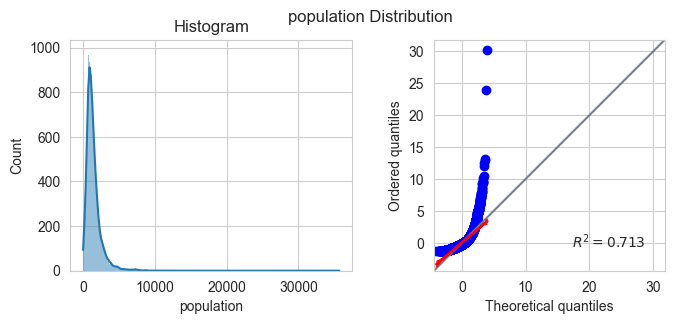

population: The distribution is right-skewed (long tail to the right) with a kurtosis of 73.55 (leptokurtic (heavy tails, more outliers)).
The histogram shows the frequency and shape of the data, while the Q-Q plot compares it to a normal distribution. Deviations from the straight line in the Q-Q plot indicate departures from normality.



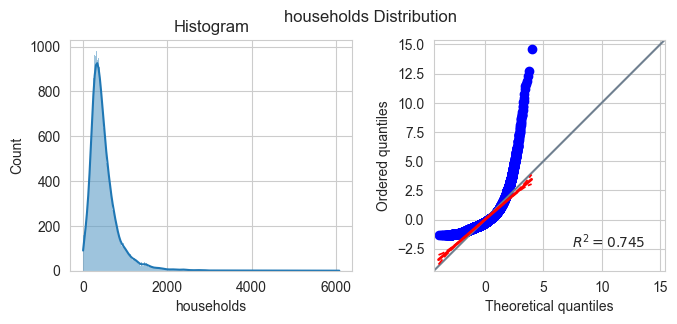

households: The distribution is right-skewed (long tail to the right) with a kurtosis of 22.06 (leptokurtic (heavy tails, more outliers)).
The histogram shows the frequency and shape of the data, while the Q-Q plot compares it to a normal distribution. Deviations from the straight line in the Q-Q plot indicate departures from normality.



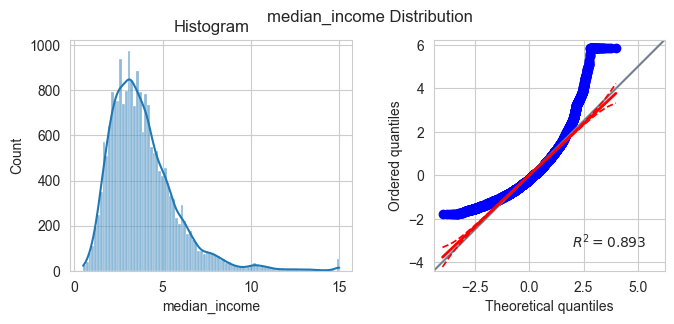

median_income: The distribution is right-skewed (long tail to the right) with a kurtosis of 4.95 (leptokurtic (heavy tails, more outliers)).
The histogram shows the frequency and shape of the data, while the Q-Q plot compares it to a normal distribution. Deviations from the straight line in the Q-Q plot indicate departures from normality.



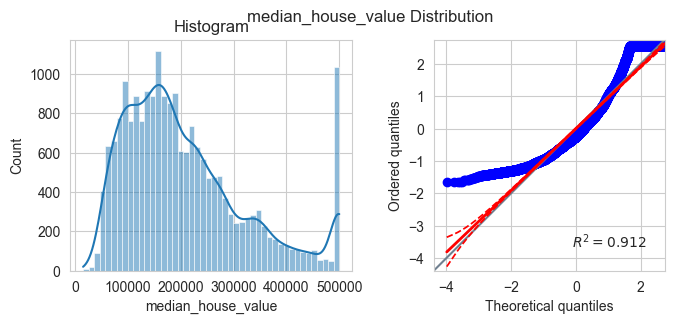

median_house_value: The distribution is right-skewed (long tail to the right) with a kurtosis of 0.33 (platykurtic (light tails, fewer outliers)).
The histogram shows the frequency and shape of the data, while the Q-Q plot compares it to a normal distribution. Deviations from the straight line in the Q-Q plot indicate departures from normality.



In [17]:
# For each numerical column in the dataframe, plot its histogram and Q-Q plot to visually inspect distribution and normality.
# Also, print skewness and kurtosis with descriptive interpretation for each variable.

for col in df.select_dtypes(include='number').columns:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
    sns.histplot(data=df, x=col, kde=True, ax=axes[0])
    axes[0].set_title("Histogram")
    pg.qqplot(df[col], dist='norm', ax=axes[1])
    fig.suptitle(f"{col} Distribution")
    plt.show()

    skew = df[col].skew()
    kurt = df[col].kurtosis()
    if abs(skew) < 0.5:
        skew_desc = "approximately symmetric"
    elif skew > 0.5:
        skew_desc = "right-skewed (long tail to the right)"
    else:
        skew_desc = "left-skewed (long tail to the left)"
    if kurt > 3:
        kurt_desc = "leptokurtic (heavy tails, more outliers)"
    elif kurt < 3:
        kurt_desc = "platykurtic (light tails, fewer outliers)"
    else:
        kurt_desc = "mesokurtic (normal tails)"
    print(f"{col}: The distribution is {skew_desc} with a kurtosis of {kurt:.2f} ({kurt_desc}).")
    print("The histogram shows the frequency and shape of the data, while the Q-Q plot compares it to a normal distribution. Deviations from the straight line in the Q-Q plot indicate departures from normality.\n")

#### Outlier Removal
First we remove 2 outliers from population variable because these two data points are far from other data points in a big dataset but before that we will name the new df as df_ml and check the top 10 maximum values of population variable in next step


In [18]:
# Create a copy of the original dataframe for machine learning processing
df_ml = df.copy()
print(df_ml.shape)
df_ml.head(3)

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


check for top 10 maximum values

In [ ]:
# Display the top 5 rows with the highest population values in the df_ml dataframe
df_ml['population'].sort_values(ascending=False).head()

15360    35682.0
9880     28566.0
13139    16305.0
10309    16122.0
6057     15507.0
Name: population, dtype: float64

Now we remove the outliers in this step

In [19]:
# Remove two outlier rows from df_ml where the population is 35682.0 or 28566.0
df_ml = df_ml.query("population != 35682.0 and population != 28566.0")

check for data shape again

In [20]:
# Display the shape of the df_ml dataframe and show the top 5 rows with the highest population values
print(df_ml.shape)
df_ml['population'].sort_values(ascending=False).head()

(20638, 10)


13139    16305.0
10309    16122.0
6057     15507.0
6066     15037.0
12215    13251.0
Name: population, dtype: float64

#### Log Transformation
Now we will apply log(1 + x) transformation to skewed numerical features total_rooms, total_bedrooms, population, and households. This reduces the effect of extreme values, making distributions more Gaussian-like and often improving model performance.

In [21]:
# Apply log(1 + x) transformation to handle skewness in numerical features
df_ml['total_rooms'] = np.log(df_ml['total_rooms'] + 1)      # Rooms per block
df_ml['total_bedrooms'] = np.log(df_ml['total_bedrooms'] + 1)  # Bedrooms per block
df_ml['population'] = np.log(df_ml['population'] + 1)        # Residents per block
df_ml['households'] = np.log(df_ml['households'] + 1)        # Households per block

We will check again the distributon through QQ plot after log transformation and removal of outlier

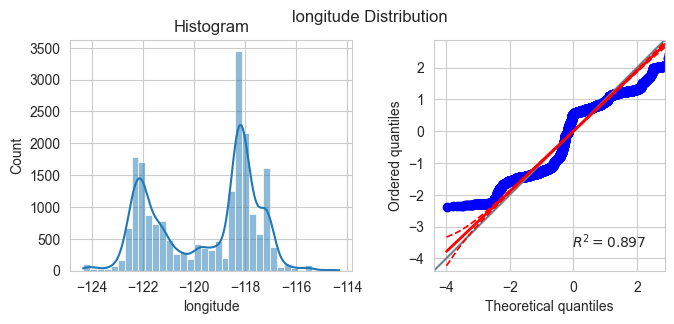

longitude: The distribution is approximately symmetric with a kurtosis of -1.33 (platykurtic (light tails, fewer outliers)).


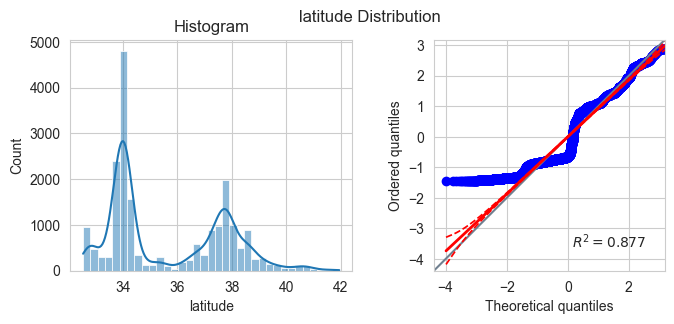

latitude: The distribution is approximately symmetric with a kurtosis of -1.12 (platykurtic (light tails, fewer outliers)).


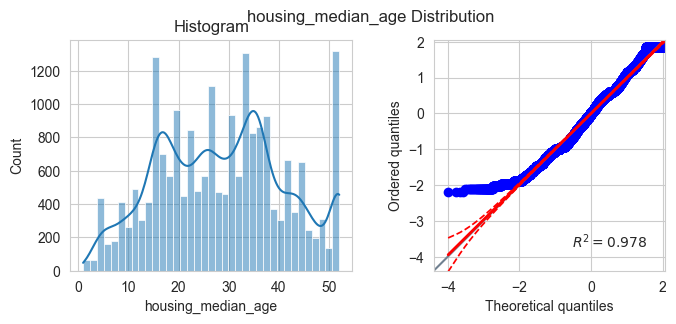

housing_median_age: The distribution is approximately symmetric with a kurtosis of -0.80 (platykurtic (light tails, fewer outliers)).


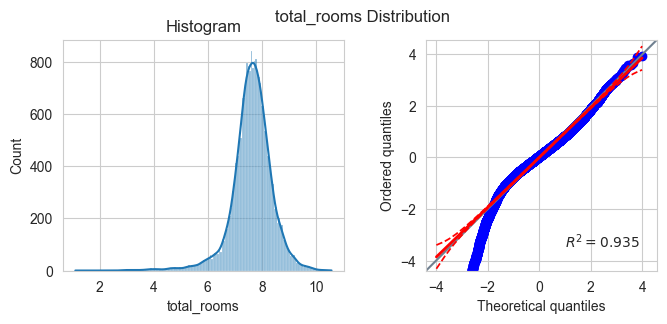

total_rooms: The distribution is left-skewed (long tail to the left) with a kurtosis of 5.08 (leptokurtic (heavy tails, more outliers)).


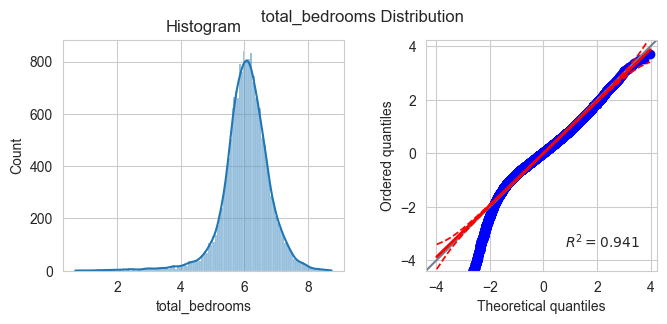

total_bedrooms: The distribution is left-skewed (long tail to the left) with a kurtosis of 4.58 (leptokurtic (heavy tails, more outliers)).


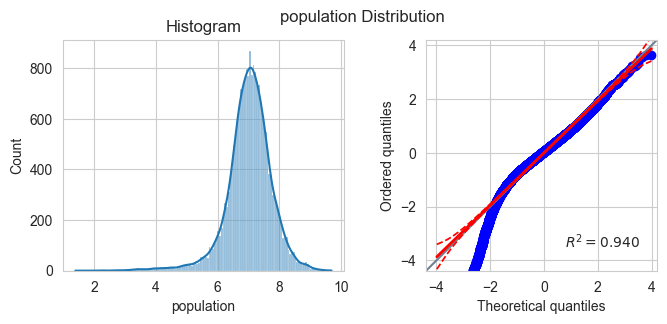

population: The distribution is left-skewed (long tail to the left) with a kurtosis of 4.47 (leptokurtic (heavy tails, more outliers)).


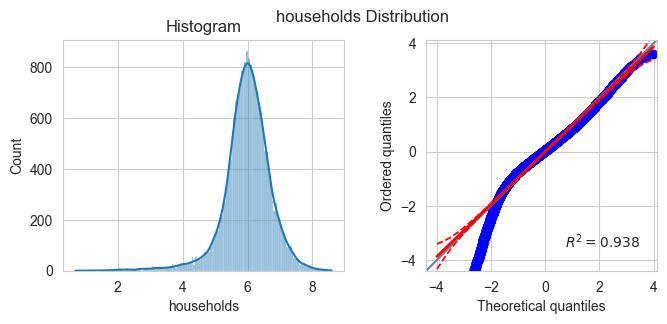

households: The distribution is left-skewed (long tail to the left) with a kurtosis of 4.48 (leptokurtic (heavy tails, more outliers)).


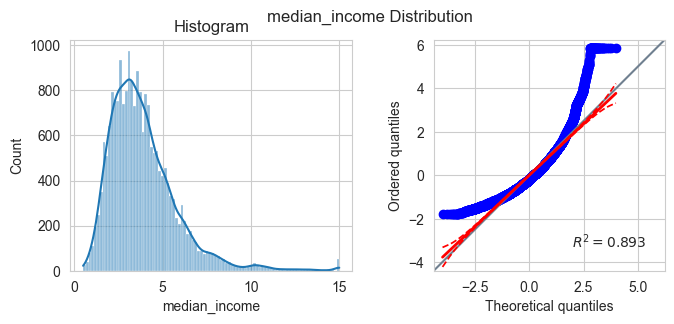

median_income: The distribution is right-skewed (long tail to the right) with a kurtosis of 4.95 (leptokurtic (heavy tails, more outliers)).


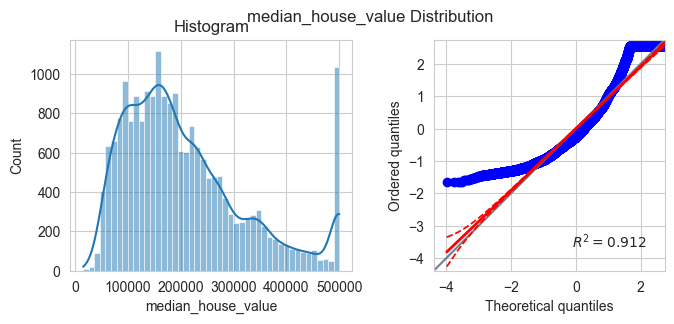

median_house_value: The distribution is right-skewed (long tail to the right) with a kurtosis of 0.33 (platykurtic (light tails, fewer outliers)).


In [22]:
# For each numerical column in the df_ml dataframe, plot its histogram and Q-Q plot to visually inspect distribution and normality.
# Also, print skewness and kurtosis with descriptive interpretation for each variable.

for col in df_ml.select_dtypes(include='number').columns:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
    sns.histplot(data=df_ml, x=col, kde=True, ax=axes[0])
    axes[0].set_title("Histogram")
    pg.qqplot(df_ml[col], dist='norm', ax=axes[1])
    fig.suptitle(f"{col} Distribution")
    plt.show()

    skew = df_ml[col].skew()
    kurt = df_ml[col].kurtosis()
    if abs(skew) < 0.5:
        skew_desc = "approximately symmetric"
    elif skew > 0.5:
        skew_desc = "right-skewed (long tail to the right)"
    else:
        skew_desc = "left-skewed (long tail to the left)"
    if kurt > 3:
        kurt_desc = "leptokurtic (heavy tails, more outliers)"
    elif kurt < 3:
        kurt_desc = "platykurtic (light tails, fewer outliers)"
    else:
        kurt_desc = "mesokurtic (normal tails)"
    print(f"{col}: The distribution is {skew_desc} with a kurtosis of {kurt:.2f} ({kurt_desc}).")

Now we can see the 4 variables total_rooms, total_bedrooms, population, and households are little bit towards normality rather than completey skwed in either dorection. We will not touch other skewed varaibles as they are important to keep them in original form.
Now once again we will check the shape and structure of our dataset

In [23]:
print(df_ml.shape)
df_ml.dtypes

(20638, 10)


longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

check for missing values again

In [25]:
# Check for missing values in each column of the df_ml dataframe
df_ml.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

We can see that there are some missing values but and there is one categorical variable, we will fill the missing values using median and encode the categorical variable using ordinal encoder in our ML pipeline but first we will split our data

### Train Test Split




In [26]:
# Split the data into training and test sets
# Features: all columns except 'median_house_value'
# Target: 'median_house_value'
# 20% of the data is used for testing, random_state ensures reproducibility

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_ml.drop(['median_house_value'], axis=1),
    df_ml['median_house_value'],
    test_size=0.2,
    random_state=101
)

print("* Train set:", X_train.shape, y_train.shape, "\n* Test set:", X_test.shape, y_test.shape)

* Train set: (16510, 9) (16510,) 
* Test set: (4128, 9) (4128,)


#### Pipeline for all models
The idea is we will use multiple algorithms and we will see which one gives us the best score and according to that we define our pipeline 

In [34]:
# Define a function to create a machine learning pipeline for model optimization.
# The pipeline includes:
# - Median imputation for 'total_bedrooms'
# - One-hot encoding for 'ocean_proximity' (dropping the last category)
# - Feature scaling using StandardScaler
# - Feature selection using SelectFromModel with the provided model
# - The final estimator (model)
def PipelineOptimization(model):
  pipeline_base = Pipeline([
      ('imputer', MeanMedianImputer(imputation_method='median', variables= ['total_bedrooms'])),
      ('ohe_encoder', OneHotEncoder(variables=['ocean_proximity'], drop_last=True)),
      ("feat_scaling", StandardScaler() ),
      ("feat_selection",  SelectFromModel(model) ),
      ("model", model ),
    ])
  return pipeline_base

Next, we create a Python class (HyperparameterOptimizationSearch) which aims to fit a set of algorithms with multiple hyperparameters.
The idea is, we define a set of algorithms and their respective hyperparameter values and the code iterates on each algorithm and fits pipelines using GridSearchCV

#### Python class to fit a set of algorithms with multiple hyperparameter.

In [36]:
# Define a class for hyperparameter optimization using GridSearchCV for multiple models.
# The class stores the models and their parameter grids, fits GridSearchCV for each model,
# and provides a summary of cross-validation scores for comparison.

class HyperparameterOptimizationSearch:

    def __init__(self, models, params):
        # Store models and their parameter grids
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv, n_jobs, verbose=1, scoring=None, refit=False):
        # Fit GridSearchCV for each model in the dictionary
        for key in self.keys:
            print(f"\nRunning GridSearchCV for {key} \n")
            model = PipelineOptimization(self.models[key])
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring)
            gs.fit(X, y)
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score'):
        # Summarize cross-validation scores for all models
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params, **d})

        rows = []
        for k in self.grid_searches:
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params), 1))

            all_scores = np.hstack(scores)
            for p, s in zip(params, all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns], self.grid_searches

We now define a list of models in a variable models_search

In [37]:
# Define a dictionary of regression models to be used for hyperparameter optimization search.
# Each key is a model name, and the value is an instance of the corresponding regressor with a fixed random_state for reproducibility.

models_search = {
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=0),
    "RandomForestRegressor": RandomForestRegressor(random_state=0),
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state=0),
    "ExtraTreesRegressor": ExtraTreesRegressor(random_state=0),
    "AdaBoostRegressor": AdaBoostRegressor(random_state=0),
}

Before defining our own hyperparameters first we use default hyperparameters values to save time and once we have the best model then we define the hyperparameters for that model

In [38]:
# Define an empty parameter grid for each model to use default hyperparameters in the initial search
params_search = {
    "DecisionTreeRegressor": {},
    "RandomForestRegressor": {},
    "GradientBoostingRegressor": {},
    "ExtraTreesRegressor": {},
    "AdaBoostRegressor": {},
}

Now use our custom class HyperparameterOptimizationSearch to assign an object called search

In [39]:
# Perform hyperparameter optimization search using the custom class
# This will fit each model in models_search with the corresponding parameter grid in params_search
# Uses R^2 as the scoring metric, 2-fold cross-validation, and all available processors
search = HyperparameterOptimizationSearch(models=models_search, params=params_search)
search.fit(X_train, y_train,
           scoring='r2', # use R^2 as scoring metric
           verbose=1,    # print progress
           n_jobs=-1,    # use all processors, but one
           cv=2)


Running GridSearchCV for DecisionTreeRegressor 

Fitting 2 folds for each of 1 candidates, totalling 2 fits

Running GridSearchCV for RandomForestRegressor 

Fitting 2 folds for each of 1 candidates, totalling 2 fits

Running GridSearchCV for GradientBoostingRegressor 

Fitting 2 folds for each of 1 candidates, totalling 2 fits

Running GridSearchCV for ExtraTreesRegressor 

Fitting 2 folds for each of 1 candidates, totalling 2 fits

Running GridSearchCV for AdaBoostRegressor 

Fitting 2 folds for each of 1 candidates, totalling 2 fits


#### Dataframe with best models
Now the score_summary method in our python class returns a DataFrame with all the training results summary and a dictionary containing all pipelines.

In [40]:
# Get the summary of grid search results sorted by mean score
# grid_search_summary: DataFrame with cross-validation results for each model
# grid_search_pipelines: dictionary of fitted GridSearchCV objects for each model
grid_search_summary, grid_search_pipelines = search.score_summary(sort_by='mean_score')
grid_search_summary

,estimator,min_score,mean_score,max_score,std_score
1,RandomForestRegressor,0.797482,0.806231,0.81498,0.008749
0,DecisionTreeRegressor,0.665818,0.669153,0.672489,0.003335
2,GradientBoostingRegressor,0.602785,0.636011,0.669238,0.033227
4,AdaBoostRegressor,0.425565,0.462614,0.499663,0.037049
3,ExtraTreesRegressor,0.337277,0.340967,0.344656,0.00369


We can see that RandomForest came out on the top with the best score while others are far from RandomForest so will not consider them.
Now we test fot the best hyperpermeter for RandomForest
After running several values and depths for hyperparameters, we decided on 200, 300, and 400 for our model

In [41]:
# Define the model and parameter grid for hyperparameter search
# Here, we only use RandomForestRegressor and specify a range of n_estimators to tune
models_search = {"RandomForestRegressor": RandomForestRegressor(random_state=0)}
params_search = {"RandomForestRegressor": {"model__n_estimators": [200, 300, 400]}}
  

Now we use our HyperparameterOptimizationSearch class again with updated information on models_search and params_search variables

In [42]:
# Perform hyperparameter optimization search using the custom class
# This will fit the RandomForestRegressor model with the specified parameter grid (n_estimators: 200, 300, 400)
# Uses R^2 as the scoring metric, 2-fold cross-validation, and all available processors
search = HyperparameterOptimizationSearch(models=models_search, params=params_search)
search.fit(X_train, y_train,
           scoring='r2', # use R^2 as scoring metric
           verbose=3,    # print progress for each cross-validation
           n_jobs=-1,    # use all processors
           cv=2)


Running GridSearchCV for RandomForestRegressor 

Fitting 2 folds for each of 3 candidates, totalling 6 fits


Now we use our score_summary method again to see the best hyperparameters

In [43]:
# Get the summary of grid search results sorted by mean score
# grid_search_summary: DataFrame with cross-validation results for each model
# grid_search_pipelines: dictionary of fitted GridSearchCV objects for each model
grid_search_summary, grid_search_pipelines = search.score_summary(sort_by='mean_score')
grid_search_summary

,estimator,min_score,mean_score,max_score,std_score,model__n_estimators
2,RandomForestRegressor,0.800089,0.8078,0.815511,0.007711,400
1,RandomForestRegressor,0.799622,0.807476,0.81533,0.007854,300
0,RandomForestRegressor,0.799399,0.80722,0.815041,0.007821,200


we grab the best model name by using .iloc[ ] on the first row and column from the previous DataFrame.


In [44]:
# Select the best model name from the grid_search_summary DataFrame.
# This picks the estimator with the highest mean score (first row after sorting).
best_model = grid_search_summary.iloc[0,0]
best_model

'RandomForestRegressor'

we can see above the best parameters but let's get the best model parameters using attribute .best_params_

In [45]:
# Display the best hyperparameters found for the best model (RandomForestRegressor) from the grid search
grid_search_pipelines[best_model].best_params_

{'model__n_estimators': 400}

Finally, we want to grab the best pipeline

In [46]:
# Retrieve the best pipeline (estimator) from the grid search results for the best model
# This pipeline includes all preprocessing and the trained RandomForestRegressor with optimal hyperparameters
best_pipeline = grid_search_pipelines[best_model].best_estimator_
best_pipeline

Pipeline(steps=[('imputer', MeanMedianImputer(variables=['total_bedrooms'])),
                ('ohe_encoder',
                 OneHotEncoder(drop_last=True, variables=['ocean_proximity'])),
                ('feat_scaling', StandardScaler()),
                ('feat_selection',
                 SelectFromModel(estimator=RandomForestRegressor(random_state=0))),
                ('model',
                 RandomForestRegressor(n_estimators=400, random_state=0))])

#### Most Important Features in Model
Now we will see which features are most important role in this dataset and model.
The best pipeline is a tree-based algorithm, so we can check the most important features with .feature_importances_ attribute.
We will also plot them



* These are the 4 most important features in descending order. The model was trained on them: 
['median_income', 'longitude', 'latitude', 'ocean_proximity_INLAND']


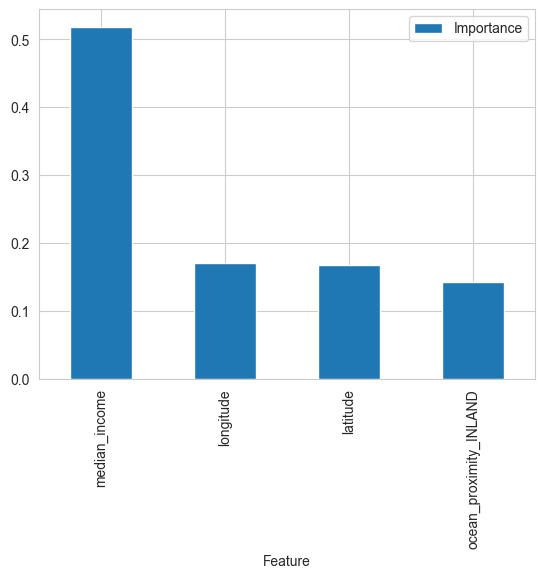


Conclusion:
The RandomForestRegressor model identified the most influential features for predicting California housing prices. Feature importance analysis helps us understand which variables drive the model's predictions, enabling better interpretation and potential feature selection for future modeling.


In [47]:
# Number of steps in the pipeline to include for data cleaning and feature engineering
data_cleaning_feat_eng_steps = 2

# Get the column names after applying the first two steps of the pipeline to the training set
columns_after_data_cleaning_feat_eng = (
      Pipeline(best_pipeline.steps[:data_cleaning_feat_eng_steps])
      .fit(X_train, y_train)
      .transform(X_train)
)
# After encoding, columns are converted to numpy array, so get feature names from encoder
# Get feature names after imputation and encoding
encoder = best_pipeline.named_steps['ohe_encoder']
imputer = best_pipeline.named_steps['imputer']
# Impute and encode to get feature names
X_temp = imputer.fit_transform(X_train)
feature_names = list(X_temp.columns)
encoded_feature_names = encoder.get_feature_names_out(feature_names)
columns_after_data_cleaning_feat_eng = encoded_feature_names

# Get a boolean mask of the selected features from the feature selection step
# Use this mask to select the best feature names
best_features = np.array(columns_after_data_cleaning_feat_eng)[
      best_pipeline['feat_selection'].get_support()
].tolist()

# Create a DataFrame to display feature importances from the trained model
df_feature_importance = (
      pd.DataFrame({
            'Feature': best_features,
            'Importance': best_pipeline['model'].feature_importances_
      })
      .sort_values(by='Importance', ascending=False)
)

# Print the most important features and their count
print(
      f"* These are the {len(best_features)} most important features in descending order. "
      f"The model was trained on them: \n{df_feature_importance['Feature'].to_list()}"
)

# Plot the feature importances
df_feature_importance.plot(kind='bar', x='Feature', y='Importance')
plt.show()

# Conclusion
print("\nConclusion:")
print("The RandomForestRegressor model identified the most influential features for predicting California housing prices. "
        "Feature importance analysis helps us understand which variables drive the model's predictions, "
        "enabling better interpretation and potential feature selection for future modeling.")

#### Model Evaluation
Now we want to see the performance of our model. To see that we will use R2 Score,Mean Absolute Error, Mean Squared Error,
and Root Mean Squared Error for our both Train and Test sets
Next we define functions whcih will display the scores and will also plot them

In [50]:
# Function to evaluate regression model performance on both training and test sets
def regression_performance(X_train, y_train, X_test, y_test, pipeline):
  """
  Prints regression evaluation metrics for both training and test sets using the provided pipeline.
  """
  print("Model Evaluation \n")
  print("* Train Set")
  regression_evaluation(X_train, y_train, pipeline)
  print("* Test Set")
  regression_evaluation(X_test, y_test, pipeline)

def regression_evaluation(X, y, pipeline):
  """
  Prints R2 Score, Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error
  for predictions made by the pipeline on the given data.
  """
  prediction = pipeline.predict(X)
  print('R2 Score:', r2_score(y, prediction).round(3))  
  print('Mean Absolute Error:', mean_absolute_error(y, prediction).round(3))  
  print('Mean Squared Error:', mean_squared_error(y, prediction).round(3))  
  print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y, prediction)).round(3))
  print("\n")

def regression_evaluation_plots(X_train, y_train, X_test, y_test, pipeline, alpha_scatter=0.5):
  """
  Plots scatter plots of actual vs. predicted values for both training and test sets.
  Also plots a red line representing perfect predictions.
  """
  pred_train = pipeline.predict(X_train)
  pred_test = pipeline.predict(X_test)

  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
  sns.scatterplot(x=y_train, y=pred_train, alpha=alpha_scatter, ax=axes[0])
  sns.lineplot(x=y_train, y=y_train, color='red', ax=axes[0])
  axes[0].set_xlabel("Actual")
  axes[0].set_ylabel("Predictions")
  axes[0].set_title("Train Set")

  sns.scatterplot(x=y_test, y=pred_test, alpha=alpha_scatter, ax=axes[1])
  sns.lineplot(x=y_test, y=y_test, color='red', ax=axes[1])
  axes[1].set_xlabel("Actual")
  axes[1].set_ylabel("Predictions")
  axes[1].set_title("Test Set")
  plt.show()

Now we check the scores and plot them by calling above functions

Model Evaluation 

* Train Set
R2 Score: 0.977
Mean Absolute Error: 11239.313
Mean Squared Error: 308991989.666
Root Mean Squared Error: 17578.168


* Test Set
R2 Score: 0.819
Mean Absolute Error: 30536.628
Mean Squared Error: 2403574885.83
Root Mean Squared Error: 49026.267




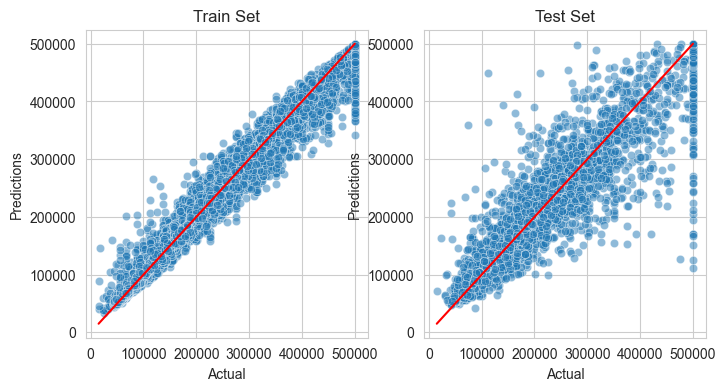

In [ ]:
# Evaluate the performance of the best pipeline on both training and test sets.
# This will print R2 Score, Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error.
regression_performance(X_train, y_train, X_test, y_test, pipeline=best_pipeline)

# Plot actual vs. predicted values for both training and test sets.
regression_evaluation_plots(X_train, y_train, X_test, y_test, 
                            pipeline=best_pipeline, alpha_scatter=0.5)



#### Save the Model
Now we will save out model for future use. First we seee our model then we save it in next step

In [62]:
# Display the trained RandomForestRegressor model from the best pipeline
best_pipeline['model']


RandomForestRegressor(n_estimators=400, random_state=0)

Using joblib to save the model

In [1]:
# Save only the trained RandomForestRegressor model (not the full pipeline) to a file using joblib
#oblib.dump(best_pipeline["model"], "../outputs/datasets/cleaned/ML_model.pkl")

#### Conclusion

The RandomForestRegressor pipeline, after hyperparameter tuning and feature engineering,
demonstrates strong predictive performance on the California housing dataset.
he evaluation metrics and scatter plots show that the model generalizes well,
with predictions closely matching actual values for both training and test sets.
This indicates the pipeline is effective for this regression task.